In [1]:
!pip install pyforest

In [2]:
import pyforest
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np

***Import data set***


In [3]:
series = pd.read_csv('country_vaccinations_2.csv', header=0)

In [4]:
series.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


Check Data types

In [5]:
series.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

Convert Datetime 

In [6]:
series.date = pd.to_datetime(series['date'])

In [7]:
series.dtypes

country                                        object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
vaccines                                       object
source_name                                    object
source_website                                 object
dtype: object

In [8]:
series.country.describe()

count         6108
unique         133
top       Scotland
freq            89
Name: country, dtype: object

Plot Missing Data

<IPython.core.display.Javascript object>

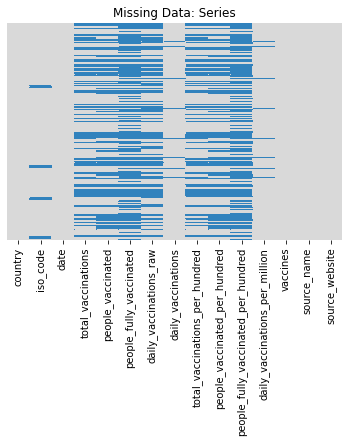

In [9]:
sns.heatmap(series.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Series')
plt.show()

See percentages of missing data

In [10]:
total_rows = series.shape[0]
null_count = series.isnull().sum()

null_count_pct = (null_count/total_rows)*100
null_count_pct

country                                 0.000000
iso_code                                5.828422
date                                    0.000000
total_vaccinations                     36.018337
people_vaccinated                      43.009168
people_fully_vaccinated                61.231172
daily_vaccinations_raw                 46.005239
daily_vaccinations                      3.127046
total_vaccinations_per_hundred         36.018337
people_vaccinated_per_hundred          43.009168
people_fully_vaccinated_per_hundred    61.231172
daily_vaccinations_per_million          3.127046
vaccines                                0.000000
source_name                             0.000000
source_website                          0.000000
dtype: float64

Create table of missing value percentages

In [11]:
pd.DataFrame(null_count_pct ,columns = ["missing_percent"])

,missing_percent
country,0.000000
iso_code,5.828422
date,0.000000
total_vaccinations,36.018337
people_vaccinated,43.009168
people_fully_vaccinated,61.231172
daily_vaccinations_raw,46.005239
daily_vaccinations,3.127046
total_vaccinations_per_hundred,36.018337
people_vaccinated_per_hundred,43.009168


In [12]:
series["iso_code"].isnull().sum()

356

Checking null values by country.  

In [13]:
series.loc[series["iso_code"].isnull() , ["country"]].value_counts()

country         
Wales               89
Scotland            89
Northern Ireland    89
England             89
dtype: int64

There is a United kingdom country along with "countries" that are within the united kingdom

In [14]:
series["country"].value_counts().head(10)


Scotland            89
England             89
Canada              89
United Kingdom      89
Northern Ireland    89
Wales               89
Russia              88
Israel              84
United States       83
Bahrain             80
Name: country, dtype: int64

In [15]:
rename_country = ["England" , "Wales" , "Scotland" , "Northern Ireland"]

for i in rename_country:
#     print(i)
     series["country"] = series["country"].str.replace(i , "United Kingdom")

In [16]:
series["country"].value_counts().head(10)

United Kingdom    445
Canada             89
Russia             88
Israel             84
United States      83
Bahrain            80
Mexico             79
Chile              79
Costa Rica         79
China              76
Name: country, dtype: int64